# Email Spam Detection With Machine Learning
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

# Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [8]:
df=pd.read_csv('C:/Users/Devi/Downloads/spam.csv',encoding="latin-1")

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Analyzing The Dataset

In [10]:
#Check column list present in df
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
#check descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
#check the number of rows and columns present in df
print('rows---->',df.shape[0])
print('columns---->',df.shape[1])

rows----> 5572
columns----> 5


In [13]:
#Lets see null value count in df
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
df.isnull().mean()*100  #check the percentage of null value

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

As we can see there are huge number of missing entries in Unnamed:2,Unnamed:3,Unnamed:4 col i.e more than 99%.So we should have to remove these column.

In [15]:
df.drop(columns=df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.shape

(5572, 2)

In [17]:
# droping duplicates
df = df.drop_duplicates(keep="first")
# Again checking for duplicate values
df.duplicated().sum()
0

0

In [18]:
# Again checing the shape  of the dataset
df.shape

(5169, 2)

# Data Processing

In [19]:
# Renaming the columns
df.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
# Ham(0) & Spam(1) counts
df["Category"].value_counts()

Category
ham     4516
spam     653
Name: count, dtype: int64

# Label Encoder

In [21]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Visualization

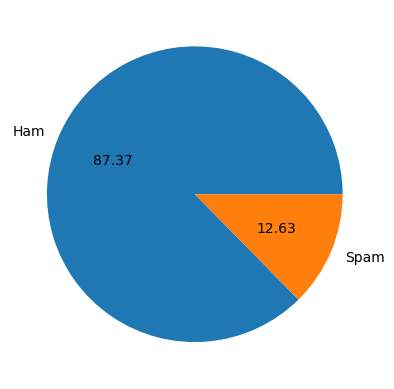

In [22]:
# Pie Chart for value counts in ham and spam
plt.pie(df["Category"].value_counts(),autopct = "%.2f",
        labels=['Ham','Spam'])
plt.show()

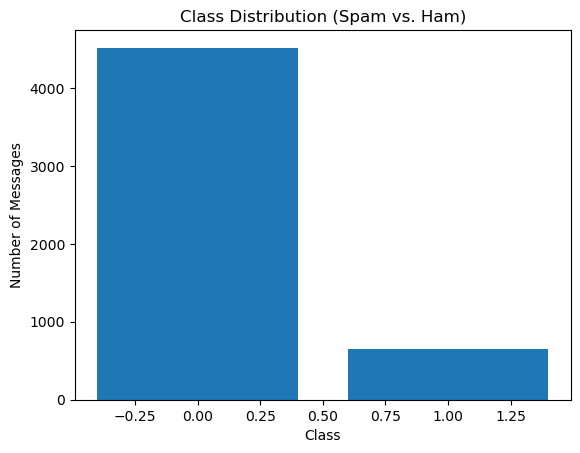

In [23]:
# Class Distribution Bar Chart
class_counts = df['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()

# Model Training

In [24]:
x = df['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [25]:
y = df["Category"]
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int32

# Splitting the data into train and test data

In [26]:
# Importing train test split library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Training The Model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)
print(X_train_cv)
print(X_test_cv)

  (0, 2667)	1
  (0, 3660)	1
  (0, 4593)	1
  (0, 6765)	1
  (0, 7353)	1
  (1, 736)	1
  (1, 4877)	1
  (1, 6731)	1
  (1, 6758)	1
  (1, 7369)	1
  (2, 4127)	1
  (2, 4692)	1
  (2, 4851)	1
  (2, 6731)	1
  (2, 6807)	1
  (2, 7233)	1
  (3, 52)	1
  (3, 251)	1
  (3, 271)	1
  (3, 516)	1
  (3, 564)	1
  (3, 938)	1
  (3, 1582)	1
  (3, 1584)	1
  (3, 1603)	1
  :	:
  (4133, 6389)	1
  (4133, 6713)	1
  (4133, 6807)	1
  (4134, 45)	1
  (4134, 216)	1
  (4134, 802)	1
  (4134, 1582)	1
  (4134, 1949)	1
  (4134, 2829)	1
  (4134, 3319)	1
  (4134, 3702)	1
  (4134, 4138)	1
  (4134, 4266)	1
  (4134, 4871)	1
  (4134, 4950)	1
  (4134, 5688)	1
  (4134, 5892)	1
  (4134, 6184)	1
  (4134, 6265)	1
  (4134, 6395)	1
  (4134, 6743)	1
  (4134, 6754)	1
  (4134, 7098)	1
  (4134, 7391)	3
  (4134, 7444)	1
  (0, 996)	1
  (0, 2276)	1
  (0, 2411)	1
  (0, 6719)	1
  (1, 890)	1
  (1, 1350)	1
  (1, 1381)	1
  (1, 1870)	1
  (1, 1951)	1
  (1, 2317)	1
  (1, 2721)	1
  (1, 3084)	1
  (1, 3110)	1
  (1, 3127)	1
  (1, 3202)	1
  (1, 3465)	1
  (1, 359

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

# Accuracy

In [31]:
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


# Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[885   4]
 [ 18 127]]


# Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


# Custom Word Prediction


In [35]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [36]:
custom_word = "Offer for internship"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"  
      
print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'Offer for internship' is predicted as: Spam


# Conclusion
In this task, I used the SMS Spam collection dataset.

Then, I trained the model using a Count Vectorizer and Logistic Regression Algorithms.

There are many analyses that were done, and a few visualizations were also done.

Finally, Using the MultinomialNB Algorithm, made a model and predicted using custom words.